<a href="https://colab.research.google.com/github/manish0496/Deeplearning/blob/master/tensorflow_ANN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep learning Tensorflow 2.0** **ANN**

Customer Churn Analysis using Tensorflow ANN

In [1]:
!pip install tensorflow==2.0.0-rc0

     |████████████████████████████████| 86.3MB 48kB/s 
     |████████████████████████████████| 4.3MB 31.8MB/s 
     |████████████████████████████████| 501kB 38.2MB/s 
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [2]:
#import libraries
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#import dataset
from google.colab import files
uploaded = files.upload()

Saving data.csv.csv to data.csv.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv.csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
#check dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#dropping irrelevant column and splitting the data
x=df.drop(['CustomerId','Surname','RowNumber','Exited'],axis=1)
y=df['Exited']

In [8]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

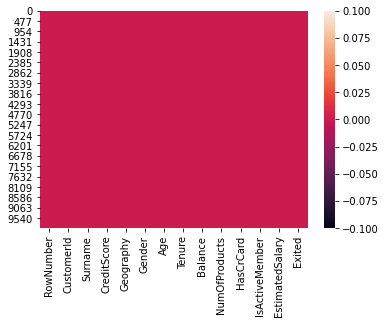

In [12]:
sns.heatmap(df.isnull())

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Geography']=le.fit_transform(x['Geography'])
x['Gender']=le.fit_transform(x['Gender'])

In [14]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [15]:
x.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [16]:
x=pd.get_dummies(x,drop_first=True,columns=['Geography'])

In [17]:
x.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1


Feature standarization

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20,stratify=y)

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [20]:
x_train

array([[ 1.058568  ,  0.90750738,  1.71508648, ...,  1.04208392,
        -0.57831252, -0.57773517],
       [ 0.91362605,  0.90750738, -0.65993547, ..., -0.62355635,
         1.72916886, -0.57773517],
       [ 1.07927399, -1.10191942, -0.18493108, ...,  0.30812779,
         1.72916886, -0.57773517],
       ...,
       [ 0.16821031, -1.10191942, -0.18493108, ..., -0.55808767,
        -0.57831252, -0.57773517],
       [ 0.37527024,  0.90750738, -0.37493284, ..., -1.35149956,
        -0.57831252,  1.73089688],
       [ 1.56586482,  0.90750738,  1.14508121, ..., -1.02692216,
        -0.57831252,  1.73089688]])

**Build model**

In [21]:
model=Sequential()
model.add(Dense(x.shape[1],activation='relu',input_dim=x.shape[1]))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:

model.fit(x_train,y_train.to_numpy(),batch_size=10,epochs=10,verbose=1)

Train on 8000 samples
Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
8000/8000 [==============================] - 2s 252us/sample - loss: 0.4458 - accuracy: 0.8136
Epoch 2/10
8000/8000 [==============================] - 2s 189us/sample - loss: 0.3882 - accuracy: 0.8430
Epoch 3/10
8000/8000 [==============================] - 2s 191us/sample - loss: 0.3611 - accuracy: 0.8506
Epoch 4/10
8000/8000 [==============================] - 2s 193us/sample - loss: 0.3494 - accuracy: 0.8549
Epoch 5/10
8000/8000 [==============================] - 2s 189us/sample - loss: 0.3439 - accuracy: 0.8562
Epoch 6/10
8000/8000 [==============================] - 1s 187us/sample - loss: 0.3419 - accuracy: 0.8591
Epoch 7/10
8000/8000 [==============================] - 2s 188us/sample - loss: 0.3387 - accuracy: 0.8600
Epoch 8/10
8000/8000 [==============================] - 2s 194us/sample - loss: 0.3370 - accuracy: 0.8605
Epoch 9/10
8000/8000 [==============

training accuracy is 86.05

In [24]:
y_pred=model.predict_classes(x_test)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int32)

In [25]:
y_test

5702    0
3667    0
1617    0
5673    0
4272    0
       ..
5768    0
833     0
9719    1
2776    0
3776    0
Name: Exited, Length: 2000, dtype: int64

In [26]:
model.evaluate(x_test,y_test.to_numpy())

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3396145040988922, 0.8585]

In [27]:
# lets use sklearn
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[1529,   64],
       [ 219,  188]])

In [28]:
accuracy_score(y_test,y_pred)

0.8585